In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data 

In [2]:
df = pd.read_csv('adult_reconstruction.csv')
df.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


# Analyze Data

In [3]:
print(df.shape)
df.describe()

(49531, 14)


,hours-per-week,age,capital-gain,capital-loss,education-num,income
count,49531.000000,49531.000000,49531.000000,49531.000000,49531.000000,49531.000000
mean,40.399184,38.554320,1064.819144,86.285114,10.069795,33509.843129
std,12.340824,13.701025,7401.671807,400.322887,2.565829,27051.436074
min,1.000000,17.000000,0.000000,0.000000,1.000000,107.000000
25%,40.000000,28.000000,0.000000,0.000000,9.000000,12027.000000
50%,40.000000,37.000000,0.000000,0.000000,10.000000,26013.000000
75%,45.000000,48.000000,0.000000,0.000000,12.000000,48457.500000
max,99.000000,90.000000,99999.000000,4356.000000,16.000000,99999.000000


In [5]:
df.isna().any()

hours-per-week    False
age               False
capital-gain      False
capital-loss      False
workclass         False
education         False
education-num     False
marital-status    False
relationship      False
race              False
gender            False
native-country    False
income            False
occupation        False
dtype: bool

In [10]:
(df.astype(str) != '?').any()

hours-per-week    True
age               True
capital-gain      True
capital-loss      True
workclass         True
education         True
education-num     True
marital-status    True
relationship      True
race              True
gender            True
native-country    True
income            True
occupation        True
dtype: bool

In [12]:
(df.astype(str) != 0).any()

hours-per-week    True
age               True
capital-gain      True
capital-loss      True
workclass         True
education         True
education-num     True
marital-status    True
relationship      True
race              True
gender            True
native-country    True
income            True
occupation        True
dtype: bool

# Decode categorical data

###### Create dummy values for all categorical data

In [43]:
# Column called 'female': Value is 1 if female, 0 otherwise
df['female'] = 1*(df['gender'] ==  'Female') 
# Column called 'male': Value is 1 if male, 0 otherwise
df['male'] = 1*(df['gender'] ==  'Male') 
dummy_vars = pd.get_dummies(df[["workclass", "education", "marital-status", "relationship", "race", "native-country", "occupation"]])
dfWithDummy = df.join(dummy_vars)
dfWithDummy.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,...,0,0,0,0,0,0,0,0,1,0
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,...,0,0,0,0,0,0,0,0,0,0
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,...,0,0,0,1,0,0,0,0,0,0
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,...,0,0,0,0,0,0,0,1,0,0
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,...,0,0,0,0,0,0,0,0,0,0


# Explore relationships

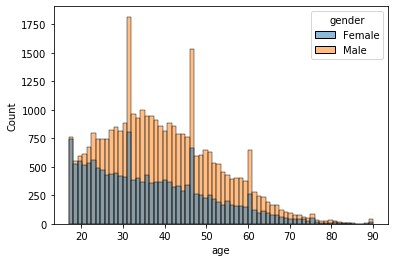

In [51]:
sns.histplot(data=dfWithDummy, x="age", hue="gender")

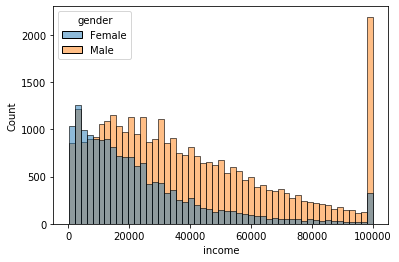

In [52]:
sns.histplot(data=dfWithDummy, x="income", hue="gender")